In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from matplotlib.colors import ListedColormap

In [66]:
X, y = make_moons(n_samples=1000, noise=.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

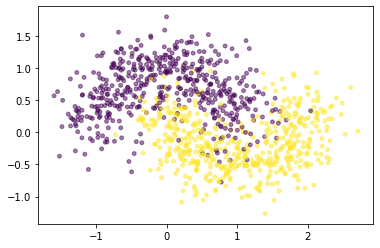

In [67]:
plt.scatter(*X.T, c=y, s=15, alpha=.5)

In [68]:
h = .05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [124]:
classifiers = [LogisticRegression(), LinearSVC(), SVC(), DecisionTreeClassifier(max_depth=5, random_state=42), 
                RandomForestClassifier(max_depth=6, random_state=42), AdaBoostClassifier(random_state=42, n_estimators=40)]
names = ['logistic regression', 'linear svd', 'svm', 'decision tree', 'random forest', 'adaboost']
pipes = []
for name, clf in zip(names, classifiers):
    pipes.append(Pipeline([('scaler', StandardScaler()), (name, clf)]))

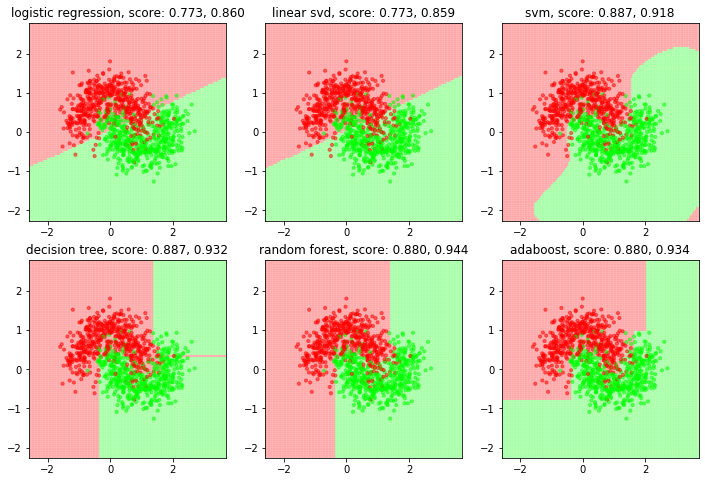

In [125]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
axs = ax.ravel()

for i, model in enumerate(pipes):
    model.fit(X_train, y_train)
    y_predicted = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_predicted = y_predicted.reshape(xx.shape)
    axs[i].pcolormesh(xx, yy, y_predicted, cmap=cmap_light, alpha=.8)
    axs[i].scatter(*X.T, c=y, alpha=.5, s=10, cmap=cmap_bold)
    axs[i].set_xlim(xx.min(), xx.max())
    axs[i].set_ylim(yy.min(), yy.max())
    axs[i].set_title(f'{names[i]}, score: {model.score(X_test, y_test):.3f}, {model.score(X_train, y_train):.3f}')